In [2]:
import torch


In [3]:
A = torch.tensor([[1.,2.,3.],[3.,-2,-7]])
A

tensor([[ 1.,  2.,  3.],
        [ 3., -2., -7.]])

In [4]:
U, S, VT = torch.linalg.svd(A)

In [4]:
print("U:\n",U)
print("Singular Values (S):\n",S)
print("VT:\n",VT)

U:
 tensor([[-0.3625, -0.9320],
        [ 0.9320, -0.3625]])
Singular Values (S):
 tensor([8.3999, 2.3329])
VT:
 tensor([[ 0.2897, -0.3082, -0.9061],
        [-0.8657, -0.4882, -0.1107],
        [ 0.4082, -0.8165,  0.4082]])


In [5]:
DS = torch.diag(S)
DS

tensor([[8.3999, 0.0000],
        [0.0000, 2.3329]])

In [6]:
M1 = torch.matmul(U,DS)
M1

tensor([[-3.0451, -2.1742],
        [ 7.8285, -0.8457]])

In [7]:
CM1 = torch.cat((M1, torch.tensor([[0], [0]])), dim=1)
CM1

tensor([[-3.0451, -2.1742,  0.0000],
        [ 7.8285, -0.8457,  0.0000]])

In [8]:
M2 = torch.matmul(CM1,VT)
M2

tensor([[ 1.0000,  2.0000,  3.0000],
        [ 3.0000, -2.0000, -7.0000]])

### **Image Compression via SVD **

In [11]:
from PIL import Image

In [12]:
! curl -O https://cdn.wallpapersafari.com/87/51/iCDpNj.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  246k  100  246k    0     0   377k      0 --:--:-- --:--:-- --:--:--  377k


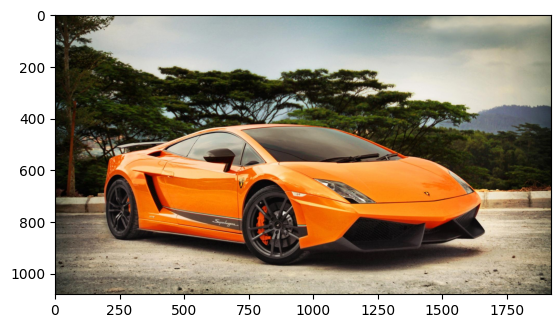

In [13]:
import matplotlib.pyplot as plt

img = Image.open('iCDpNj.jpg')
_ = plt.imshow(img)

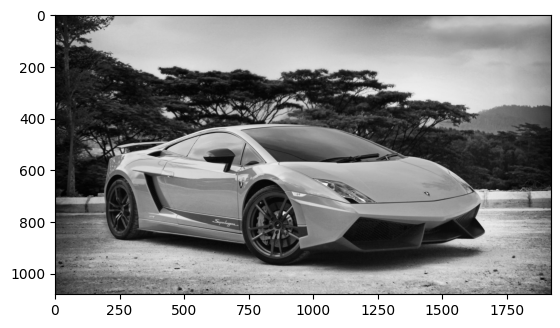

In [14]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

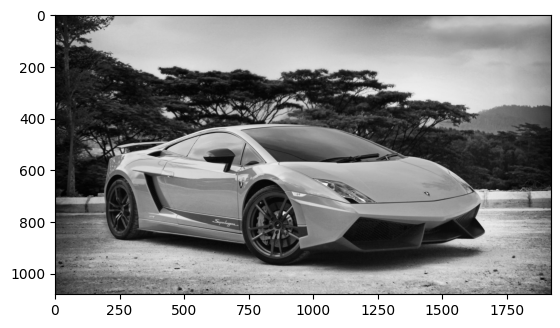

In [17]:
import numpy as np

imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imggray, cmap = 'gray')

Calculate SVD of the Image

In [18]:
U, sigma, V = np.linalg.svd(imgmat)

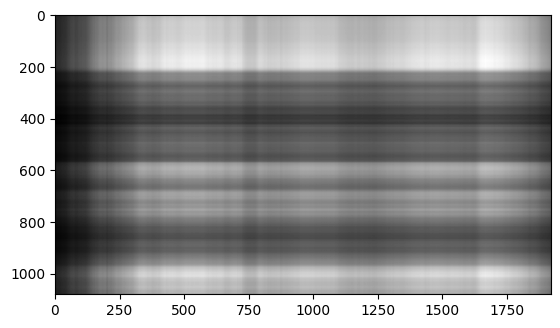

In [21]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) *np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap = 'gray')


Additional singular vectors to impove the image quality:

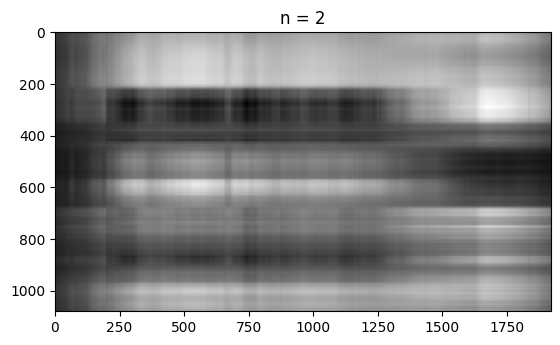

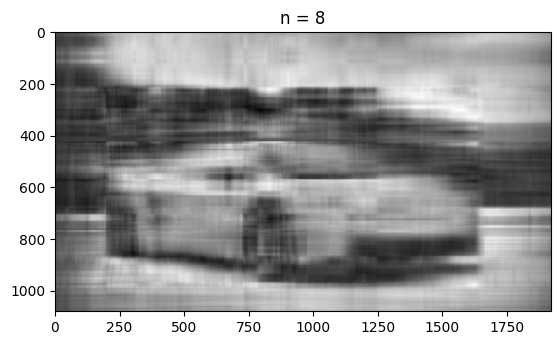

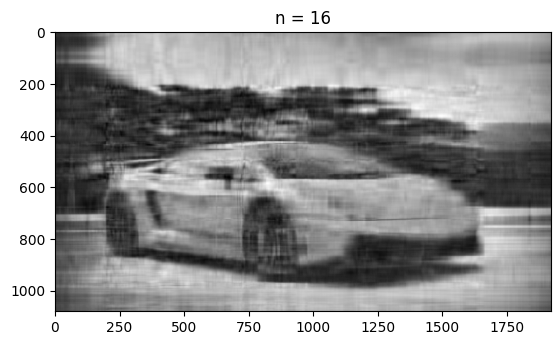

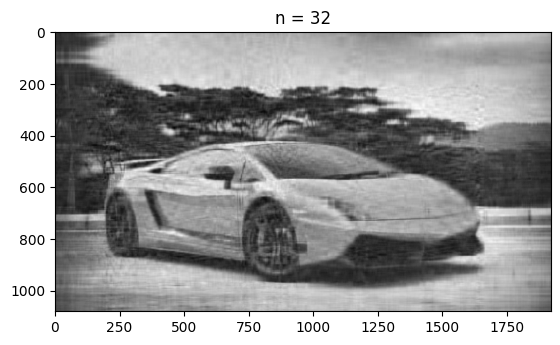

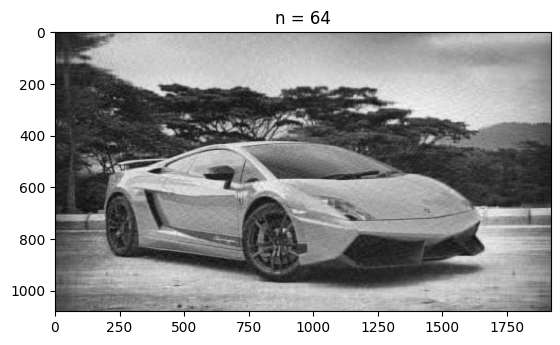

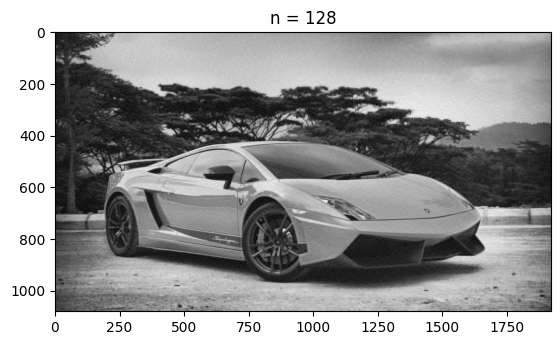

In [23]:
for i in [2,8,16,32,64,128]:
  reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) *np.matrix(V[:i, :])
  plt.imshow(reconstimg, cmap = 'gray')
  title = "n = %s" %i
  plt.title(title)
  plt.show()